In [1]:
import pandas as pd
#import libarary for Data processing/Data Analysis
import numpy as np
#import libarary for MATHEMATICAL ANALYSIS
import matplotlib.pyplot as plt
import seaborn as sns
#import libarary for  DATA VISUALIZATION

# PREPARATION OF DATA

In [2]:
def database(row):
    uni_rec_sys={
        'university_id': [f"U-{i+1}" for i in range(row)],
        'university_Name':[f"University{i+1}" for i in range(row)],
        'university_cuttoff': [np.random.randint(0,1000)for i in range(row)],
        'student_score': [np.random.randint(0,1000)for i in  range(row)],
        'branch':[np.random.choice(["Computer Engineering","Civil Engineering","Electrical Engineering","AeroSpace Engineering","Aeronautical Engineering","Electrical and Electronics Engineering","Software Engineering","Chemical Engineering","Mechanical Engineering","Information Technology","BCA","MCA","CA","MSCIT"]) for i in range(row)],
        'has_ieee':[np.random.choice([True,False]) for i in range(row)],
        'has_hostel':[np.random.choice([True,False]) for i in range(row)],
        'has_ncc':[np.random.choice([True,False]) for i in range(row)],
        'has_sportsclub':[np.random.choice([True,False]) for i in range(row)],
        'has_placement_cell':[np.random.choice([True,False]) for i in range(row)],
        'selection':[]
    }
    for i in range(row):
        if uni_rec_sys['student_score'][i]>=uni_rec_sys['university_cuttoff'][i]:
            uni_rec_sys['selection'].append("Yes")
        else:
            uni_rec_sys['selection'].append("NO")
    uni_rec_sys=pd.DataFrame(uni_rec_sys)
    uni_rec_sys.to_csv("University_info_dataset.csv",index=False)
    return uni_rec_sys.head()
database(13500)

,university_id,university_Name,university_cuttoff,student_score,branch,has_ieee,has_hostel,has_ncc,has_sportsclub,has_placement_cell,selection
0,U-1,University1,722,868,Computer Engineering,True,True,False,True,False,Yes
1,U-2,University2,707,84,AeroSpace Engineering,False,True,False,True,False,NO
2,U-3,University3,145,995,Civil Engineering,True,True,True,False,True,Yes
3,U-4,University4,637,151,Chemical Engineering,False,True,True,False,True,NO
4,U-5,University5,532,412,CA,True,True,False,True,False,NO


In [3]:
uni_rec_sys_df=pd.read_csv("University_info_dataset.csv")
#crating a dataframe from the csv file

# Data Visualization

Text(0.8, 0, 'Not Selected: 0')

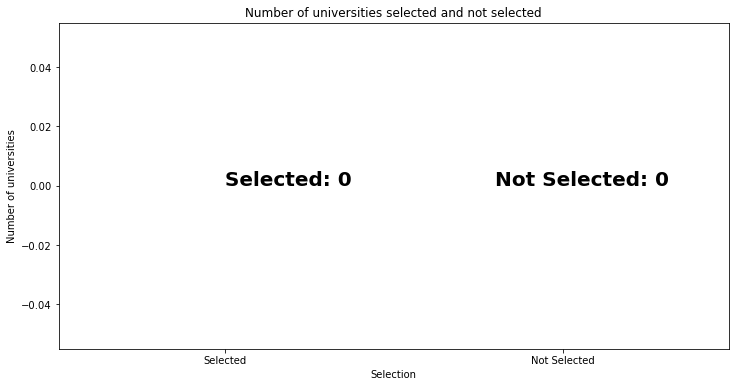

In [4]:
#graph of Selection
plt.figure(figsize=(12,6))
a=((uni_rec_sys_df['selection']==1)).sum()
b=((uni_rec_sys_df['selection']==0)).sum()
#plotting the graph for the number of universities selected and not selected
plt.bar(["Selected","Not Selected"],[a,b],color=['orange','blue'])
plt.title("Number of universities selected and not selected")
plt.xlabel("Selection")
plt.ylabel("Number of universities")
plt.annotate("Selected: "+str(a),(0,a),color='black',fontsize=20,weight='bold')
#annotating the graph with the number of universities selected and not selected
plt.annotate("Not Selected: "+str(b),(0.8,b),color='black',fontsize=20,weight='bold')
#plotting the graph for the number of universities selected and not selected
#Note if the graph doesn't show up than RERUN the cell

c:\Users\praja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


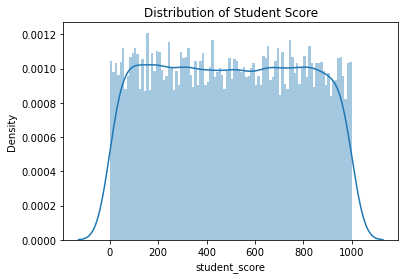

c:\Users\praja\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


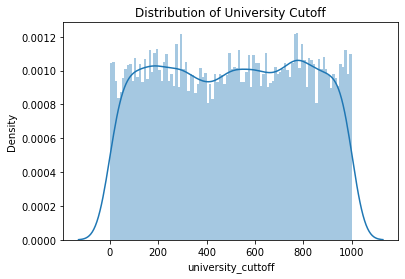

In [5]:
#Distribution of the Student Score in the university
plt.title("Distribution of Student Score")
sns.distplot(uni_rec_sys_df['student_score'],bins=100)
#plotting the graph for the distribution of the student score in the university
plt.show()
#Distribution of the Cutoff Score in the university
plt.title("Distribution of University Cutoff")
sns.distplot(uni_rec_sys_df['university_cuttoff'],bins=100)
#plotting the graph for the distribution of the cutoff score in the university
plt.show()

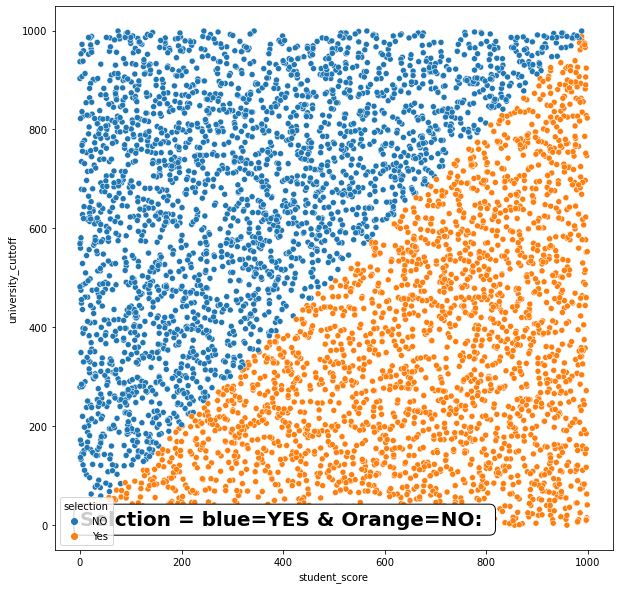

In [6]:
# Scatter plot between the student score and the cutoff score
plt.figure(figsize=(10,10))
sns.scatterplot(x='student_score',y='university_cuttoff',data=uni_rec_sys_df.sample(5000),hue='selection')
#plotting the graph for the scatter plot between the student score and the cutoff score
plt.text(0,0,"Selction = blue=YES & Orange=NO: ",color='black',fontsize=20,weight='bold',bbox=dict(facecolor='white',edgecolor='black',boxstyle='round'))
plt.show()

# Basic Steps Of Data Analysis

In [7]:
uni_rec_sys_df.describe()#describing the dataset

,university_cuttoff,student_score
count,13500.000000,13500.000000
mean,502.080519,496.214074
std,289.371094,288.770890
min,0.000000,0.000000
25%,248.750000,245.000000
50%,506.000000,496.000000
75%,756.000000,747.000000
max,999.000000,999.000000


In [8]:
uni_rec_sys_df.info()
#for checking the null values in the dataframe and the data type of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13500 entries, 0 to 13499
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   university_id       13500 non-null  object
 1   university_Name     13500 non-null  object
 2   university_cuttoff  13500 non-null  int64 
 3   student_score       13500 non-null  int64 
 4   branch              13500 non-null  object
 5   has_ieee            13500 non-null  bool  
 6   has_hostel          13500 non-null  bool  
 7   has_ncc             13500 non-null  bool  
 8   has_sportsclub      13500 non-null  bool  
 9   has_placement_cell  13500 non-null  bool  
 10  selection           13500 non-null  object
dtypes: bool(5), int64(2), object(4)
memory usage: 698.9+ KB


# Encoding the categorical data

In [9]:
from sklearn.preprocessing import LabelEncoder
#for encoding the categorical data
le = LabelEncoder()
uni_rec_sys_df['branch']=le.fit_transform(uni_rec_sys_df['branch'])
uni_rec_sys_df['student_score']=le.fit_transform(uni_rec_sys_df['student_score'])
uni_rec_sys_df['university_cuttoff']=le.fit_transform(uni_rec_sys_df['university_cuttoff'])
uni_rec_sys_df['has_ieee']=le.fit_transform(uni_rec_sys_df['has_ieee'])
uni_rec_sys_df['has_hostel']=le.fit_transform(uni_rec_sys_df['has_hostel'])
uni_rec_sys_df['has_ncc']=le.fit_transform(uni_rec_sys_df['has_ncc'])
uni_rec_sys_df['has_sportsclub']=le.fit_transform(uni_rec_sys_df['has_sportsclub'])
uni_rec_sys_df['has_placement_cell']=le.fit_transform(uni_rec_sys_df['has_placement_cell'])
uni_rec_sys_df['selection']=le.fit_transform(uni_rec_sys_df['selection'])

# Viewing the Encoded data dtypes and Null values

In [10]:
uni_rec_sys_df.info()
#for checking the null values in the dataframe and the data type of the columns after the encoding

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13500 entries, 0 to 13499
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   university_id       13500 non-null  object
 1   university_Name     13500 non-null  object
 2   university_cuttoff  13500 non-null  int64 
 3   student_score       13500 non-null  int64 
 4   branch              13500 non-null  int32 
 5   has_ieee            13500 non-null  int64 
 6   has_hostel          13500 non-null  int64 
 7   has_ncc             13500 non-null  int64 
 8   has_sportsclub      13500 non-null  int64 
 9   has_placement_cell  13500 non-null  int64 
 10  selection           13500 non-null  int32 
dtypes: int32(2), int64(7), object(2)
memory usage: 1.0+ MB


# Spliting the data into train and test

In [11]:
from sklearn.model_selection import train_test_split
#for splitting the data into train and test data
x=uni_rec_sys_df.iloc[:,2:10]
y=uni_rec_sys_df.iloc[:,10]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Feeding the data to the model

In [12]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=33)
classifier.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=33)

# Predicting the Test set results

In [13]:
y_pred=classifier.predict(x_test)
y_pred
#For predicting the values of the test data

array([0, 0, 1, ..., 1, 0, 1])

# Elbow Method to find the optimal value of k

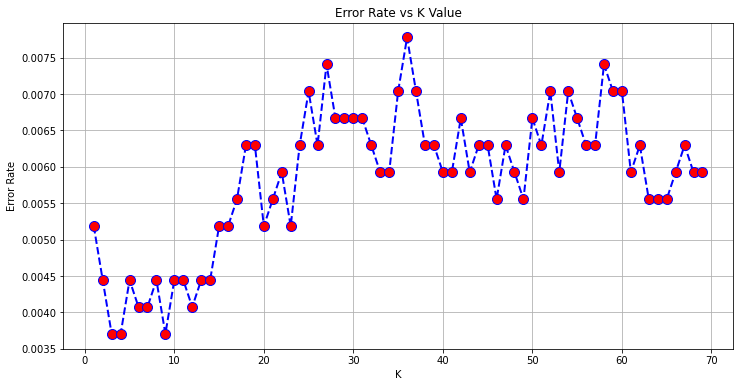

In [14]:
error_rate=[]
for i in range(1,70):
    classifier2=KNeighborsClassifier(n_neighbors=i)
    classifier2.fit(x_train,y_train)
    y_pred2=classifier2.predict(x_test)
    error_rate.append(np.mean(y_pred2!=y_test))
x=range(1,70)
y=error_rate
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(x,y,color='blue',marker='o',label='Error Rate',linestyle='dashed',linewidth=2,markersize=10,markerfacecolor='red')
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

The point in the graph which is closest to the x axis has less error rate and that is the optimal value of K(Neigbors)

# Accuracy Score, Confusion matrix, F1 Score, Precison & Recall Score

Accuracy Score
  99.4074074074074 %
Confusion matrix
 [[1377    9]
 [   7 1307]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1386
           1       0.99      0.99      0.99      1314

    accuracy                           0.99      2700
   macro avg       0.99      0.99      0.99      2700
weighted avg       0.99      0.99      0.99      2700



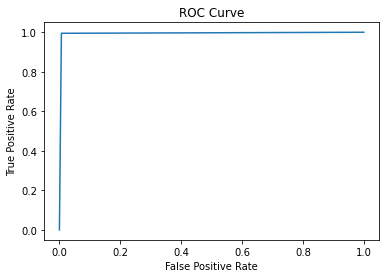

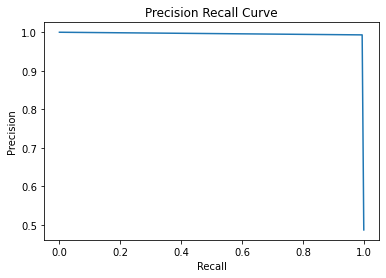

c:\Users\praja\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion Matrix')

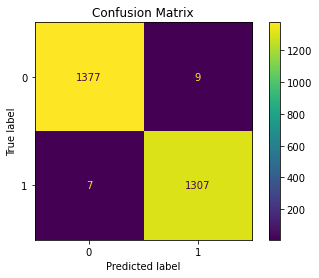

In [15]:
from sklearn.metrics import accuracy_score
print('Accuracy Score\n ',accuracy_score(y_test,y_pred)*100,'%')
#for calculating the accuracy of the model
from sklearn.metrics import confusion_matrix
print('Confusion matrix\n',confusion_matrix(y_test,y_pred))
#for calculating the confusion matrix
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
#for calculating the classification report
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)
#for calculating the roc_auc_score
from sklearn.metrics import roc_curve
fpr,tpr,threshold=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
#for calculating the roc_curve
from sklearn.metrics import precision_recall_curve
precision,recall,threshold=precision_recall_curve(y_test,y_pred)
plt.plot(recall,precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier,x_test,y_test)
plt.title('Confusion Matrix')
#for calculating the confusion matrix

# **Recommend the universities form the New Data**

In [16]:
#Creating the user defined function for the prediction of the data for the prediction of the data
def custom_pred(student_score,branch,has_ieee,has_hostel,has_ncc,has_sportsclub,has_placement_cell):
    custom_test=classifier.predict([[int(np.random.randint(0,1000)),int(f'{student_score}'),int(f'{branch}'),int(f'{has_ieee}'),int(f'{has_hostel}'),int(f'{has_ncc}'),int(f'{has_sportsclub}'),int(f'{has_placement_cell}')]])
    if custom_test==1:
        recommended_universities=uni_rec_sys_df[(uni_rec_sys_df['selection']==1)&(uni_rec_sys_df['branch']==branch)&(uni_rec_sys_df['has_ieee']==has_ieee)&(uni_rec_sys_df['has_hostel']==has_hostel)&(uni_rec_sys_df['has_sportsclub']==has_sportsclub)&(uni_rec_sys_df['has_placement_cell']==has_placement_cell)&(uni_rec_sys_df['has_ncc']==has_ncc)]
        recommended_universities["branch"]=recommended_universities['branch'].replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13],["Computer Engineering","Civil Engineering","Electrical Engineering","AeroSpace Engineering","Aeronautical Engineering","Electrical and Electronics Engineering","Software Engineering","Chemical Engineering","Mechanical Engineering","Information Technology","BCA","MCA","CA","MSCIT"])
        name=recommended_universities.loc[:,("university_id","university_Name",'branch',"university_cuttoff","has_ieee","has_hostel","has_sportsclub","has_placement_cell")].sample(n=26,replace=True).reset_index().drop('index',axis=1)
        df=pd.DataFrame(name)
        print("List of the University Recommended as per your inputs\ncheck the dataframe for the list of the universities recommended for you with the branch and other facilities you have selected in your input\n'1' means 'YES' and '0' means 'NO'")
        return df
    else:
        print("Your Score is less,so these are some universities that has low cuttoff\n You can check the below dataframe for the list of the universities with the branch and the other facilities you have selected in your input\n '1' means 'YES' and '0' means 'NO'")
        recommendation2=uni_rec_sys_df[(uni_rec_sys_df['university_cuttoff']<=student_score)&(uni_rec_sys_df['branch']==branch)]
        recommendation2["branch"]=recommendation2['branch'].replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13],["Computer Engineering","Civil Engineering","Electrical Engineering","AeroSpace Engineering","Aeronautical Engineering","Electrical and Electronics Engineering","Software Engineering","Chemical Engineering","Mechanical Engineering","Information Technology","BCA","MCA","CA","MSCIT"])
        name2=recommendation2[["university_Name","university_id","branch","university_cuttoff","has_ieee","has_hostel","has_sportsclub","has_placement_cell"]].sample(21,replace=True).reset_index().drop('index',axis=1)
        df=pd.DataFrame(name2)
        return df
#for predicting the values of the custum data
#for predicting the values form the New data using the model

<!-- **array([0]) means NO<br>**
**array([1]) means YES<br>** -->
# Enter The New Data As Per The Below Following Sequence For The University Recommendation<br>
**Student_score (Enter the score between 0 to 1000)**<br>
**branch**(0 to 13) <br>i.e("Computer Engineering","Civil Engineering","Electrical Engineering","AeroSpace Engineering","Aeronautical Engineering","Electrical and Electronics   Engineering","Software Engineering","Chemical Engineering","Mechanical Engineering","Information Technology","BCA","MCA","CA","MSCIT")<br>
**has_ieee** (1 or 0)<br>
**has_hostel** (1 or 0)<br>
**has_ncc** (1 or 0)<br>
**has_sportsclub** (1 or 0)<br>
**has_placement_cell** (1 or 0)<br>
('1' means 'YES' and '0' means 'NO')<br>
Enter your choice of the input for the university Recommendation below in the user define function





In [17]:
custom_pred(880,10,1,1,1,1,1)

List of the University Recommended as per your inputs
check the dataframe for the list of the universities recommended for you with the branch and other facilities you have selected in your input
'1' means 'YES' and '0' means 'NO'


c:\Users\praja\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\praja\AppData\Local\Temp/ipykernel_17676/712594616.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommended_universities["branch"]=recommended_universities['branch'].replace([0,1,2,3,4,5,6,7,8,9,10,11,12,13],["Computer Engineering","Civil Engineering","Electrical Engineering","AeroSpace Engineering","Aeronautical Engineering","Electrical and Electronics Engineering","Software Engineering","Chemical Engineering","Mechanical Engineering","Information Technology","BCA","MCA","CA","MSCIT"])


,university_id,university_Name,branch,university_cuttoff,has_ieee,has_hostel,has_sportsclub,has_placement_cell
0,U-12274,University12274,BCA,76,1,1,1,1
1,U-7425,University7425,BCA,233,1,1,1,1
2,U-2094,University2094,BCA,458,1,1,1,1
3,U-8666,University8666,BCA,429,1,1,1,1
4,U-11728,University11728,BCA,5,1,1,1,1
5,U-13012,University13012,BCA,294,1,1,1,1
6,U-4577,University4577,BCA,5,1,1,1,1
7,U-13012,University13012,BCA,294,1,1,1,1
8,U-4142,University4142,BCA,2,1,1,1,1
9,U-4142,University4142,BCA,2,1,1,1,1
